<a href="https://colab.research.google.com/github/Jinyu-Luo/CHL5230-Datathon1/blob/main/3_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHL5230 Datathon 1

## Introduction

In [1]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
# !pip install matplotlib seaborn
import seaborn as sns

from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [6]:
# upload the data
from google.colab import files
uploaded = files.upload()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


In [7]:
df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


The dataset consists of 23,535 observations with 10 pieces of information for each observation.

In [ ]:
# Get the shape of the dataframe
print(df.shape)

# List the columns of the dataframe
print(df.columns)

(23535, 10)
Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


### Exploratory Data Analysis

#### Descriptive Statistics
Gain some insights into the statistical properties of the dataset.

In [ ]:
# Display summary statistics
print(df.describe())

                Age        Gender  Calorie_Intake  Sugar_Intake  \
count  23535.000000  23535.000000    23535.000000  23535.000000   
mean      48.532993      0.367070     2495.845634     64.824559   
std       17.872736      0.482016      577.798752     32.004657   
min       18.000000      0.000000     1500.000000     10.000000   
25%       33.000000      0.000000     1991.000000     37.000000   
50%       48.000000      0.000000     2495.000000     65.000000   
75%       64.000000      1.000000     2994.000000     93.000000   
max       79.000000      1.000000     3499.000000    119.000000   

       Physical_Activity  Fast_Food_Frequency   Screen_Time        Height  \
count       23535.000000         23535.000000  23535.000000  23535.000000   
mean           89.496707             2.018441      5.486127      1.650279   
std            52.120810             1.414634      3.454036      0.119714   
min             0.000000             0.000000      0.000000      1.196086   
25%        

#### Check Missing Values
As displayed below, there is no missing value in our dataset.

In [ ]:
print(df.isnull().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


#### Preprocess the Data
First, encode the categorical data. As observed above, "Gender" is the only categorical column, which comprises only two categories: Male and Female. Thus, we will encode the "Gender" column by assigning 1 to Male and 0 to Female.

In [ ]:
# Check categories in Gender column
print("\nUnique values from the Gender colum:\n", df['Gender'].unique())


Unique values from the Gender colum:
 ['Female' 'Male']


In [8]:
# Preprocess the data
# Encoding 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0

### Features Examination

Below, by checking the uniqueness of entries, we found that data in `Fast_Food_Frequency` and `Screen_Time` are discrete.

In [ ]:
import numpy as np
# Check categories in fast food frequency
sorted_freq = np.sort(df['Fast_Food_Frequency'].unique())
print("\nUnique values from the Fast_Food_Freqency colum:\n", sorted_freq)


Unique values from the Fast_Food_Freqency colum:
 [0 1 2 3 4]


In [ ]:
# Check categories in screen time
sorted_screen_time = np.sort(df['Screen_Time'].unique())
print("\nUnique values from the Screen_Time colum:\n", sorted_screen_time)


Unique values from the Screen_Time colum:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]


Detect noisy data using boxplots. Note that outliers are only found in the distribution of BMI but not other predictor variables. We see that the amount of outliers in BMI is quite a lot, so it is worth to have further analysis to identify some potential systematic causes.

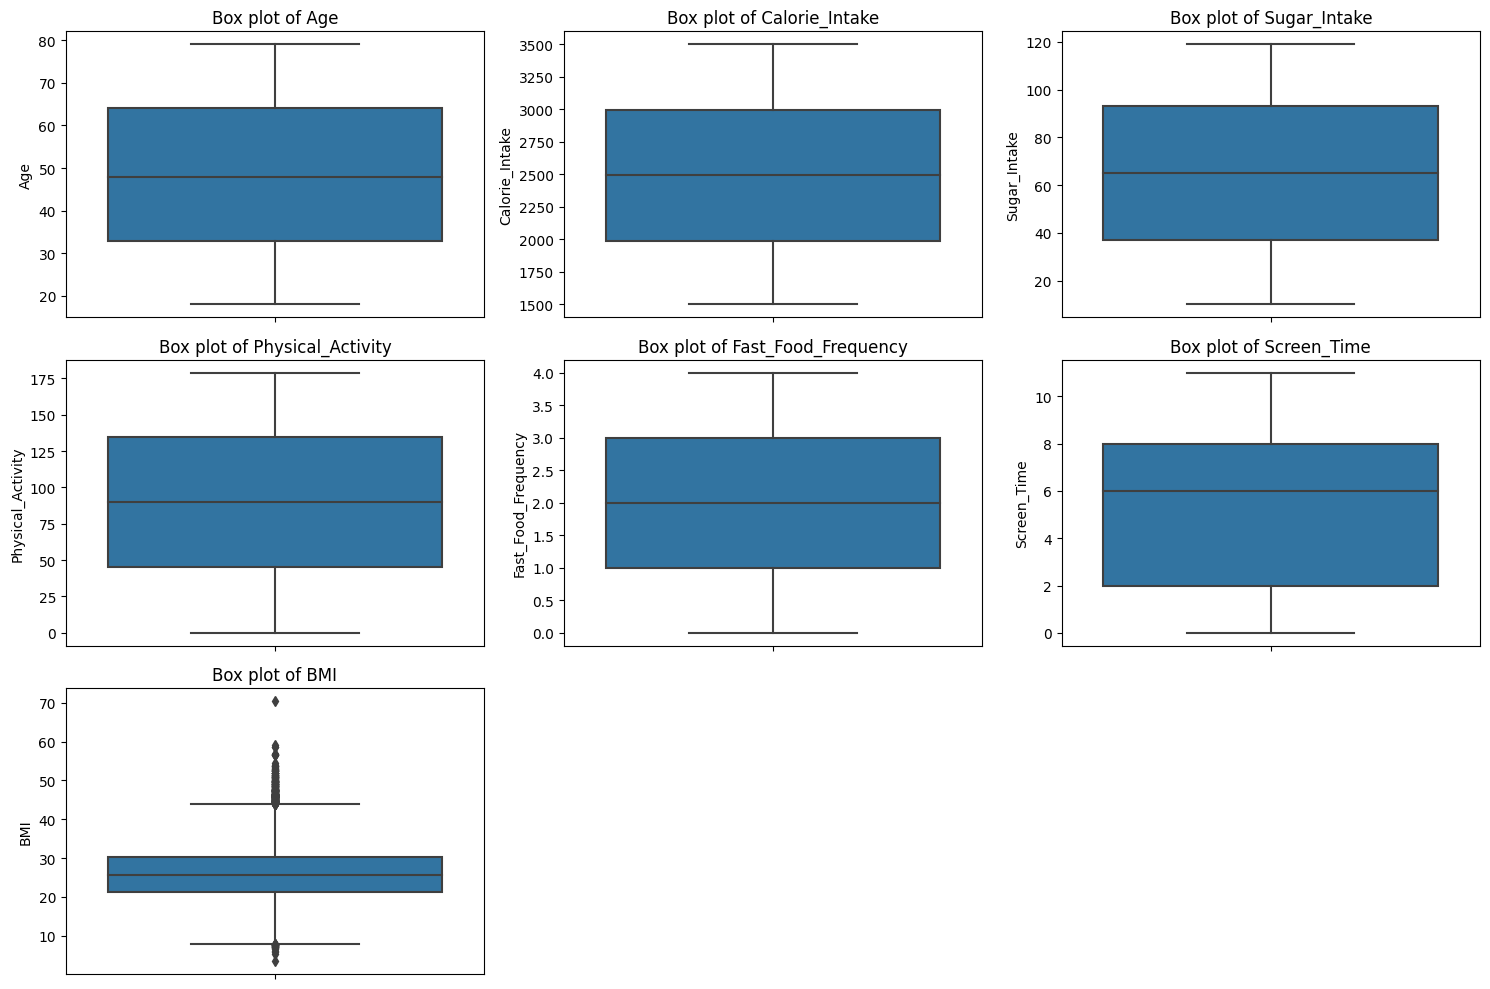

In [11]:
features = ['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
            'Fast_Food_Frequency', 'Screen_Time', 'BMI']

plt.figure(figsize = (15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust subplot dimensions based on the number of features
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

By the histograms shown below, we can see that the right tail is longer than the left, meaning that there are more individuals with a BMI above the average than those below it. This phenomenon is consistent across genders. However, the female BMI distribution has slightly fatter tails and a sharper peak than the male distribution, suggesting that there are some more extreme values in the female BMI data compared to the male data. From the perspective of public health, these extreme values might represent unique cases or or some other implications, we decided to retain these data.

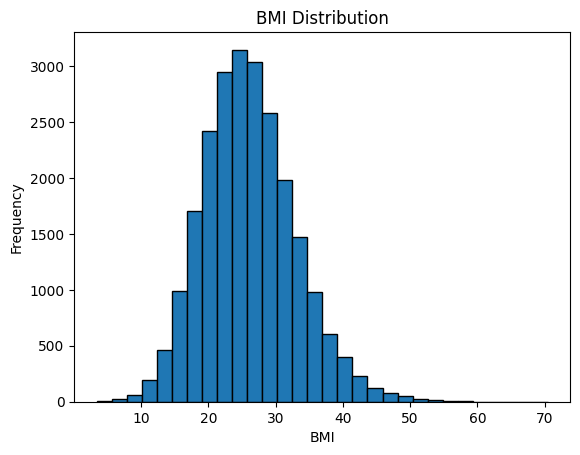

In [ ]:
plt.hist(df['BMI'], bins=30, edgecolor='k')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

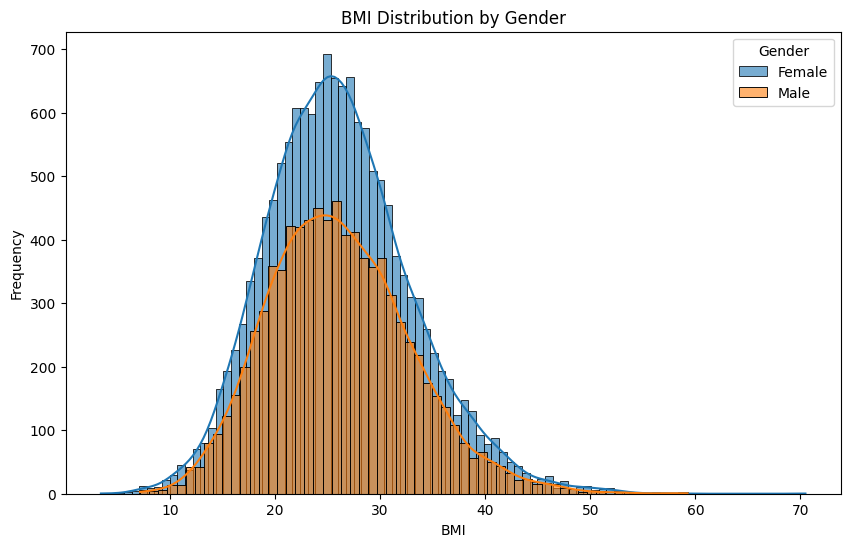

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    sns.histplot(subset['BMI'], label=gender, kde=True, alpha=0.6)

plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()

In [ ]:
from scipy.stats import kurtosis
print("\nSkewness:", df.groupby('Gender')['BMI'].skew())
print("Kurtosis:", df.groupby('Gender')['BMI'].apply(kurtosis))


Skewness: Gender
Female    0.461210
Male      0.450847
Name: BMI, dtype: float64
Kurtosis: Gender
Female    0.561742
Male      0.412364
Name: BMI, dtype: float64


### Correlation Analysis

As shown below, all the correlations in this matrix are quite weak, suggesting that there is no strong linear relationships between these variables. It could be the case that other variables not included in this dataset might have more significant impact on BMI.

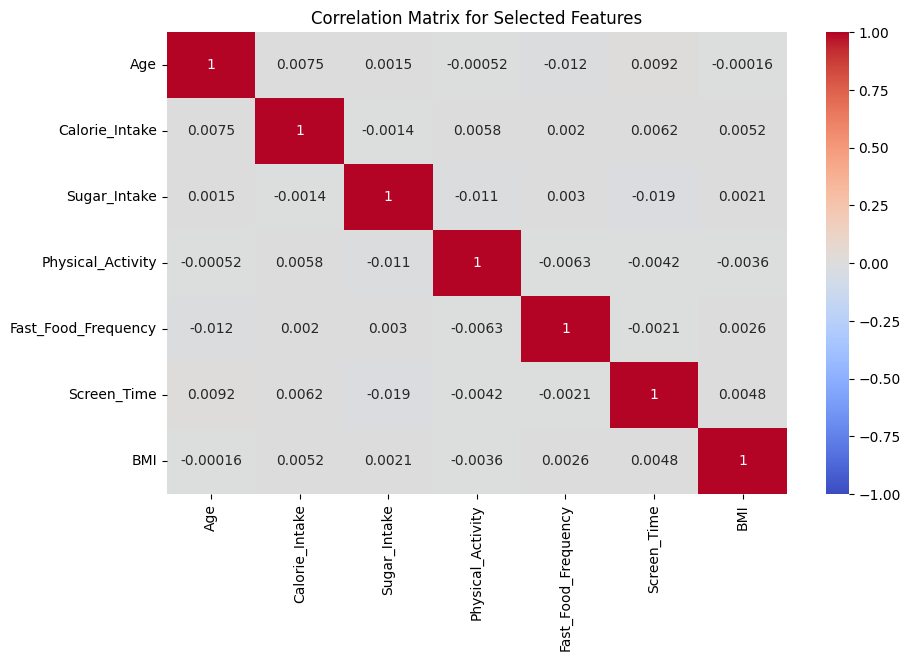

In [6]:
# Compute the correlation matrix for the selected features
correlation_matrix = df[features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Features')
plt.show()

## Data Engineering

In [9]:
# Add 'weight_status' column based on BMI
def health_status_classifier(bmi):
  if bmi < 18.5:
    return '0' # Underweight
  elif 18.5 <= bmi < 25:
    return '1' # Normal
  elif 25 <= bmi < 30:
    return '2' # overweight, moderate risk
  else:
    return '3' # obese, high risk

df['bmi_level'] = df['BMI'].apply(health_status_classifier)
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,bmi_level
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,3
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,2
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,2
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,3
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,2


Check the distribution of data according to BMI categories.

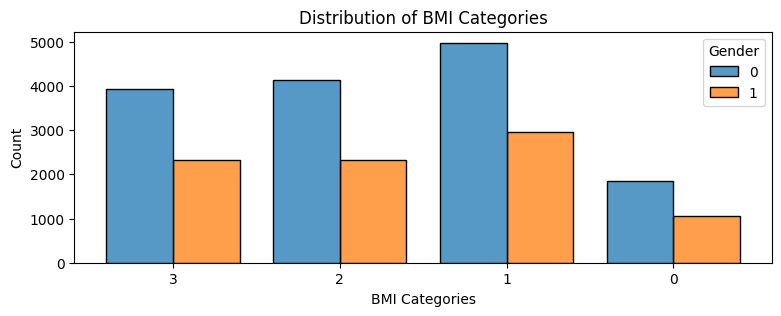

In [ ]:
# Plot for the distribution of BMI Categories against gender
plt.figure(figsize=(9,3))
sns.histplot(data = df, x = "bmi_level", hue = "Gender",
             multiple = "dodge", shrink = .8)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Categories')
plt.ylabel("Count")
plt.show()

Observed that
*   The proportion of people fall into the category 0 ('underweight') is only half of the other categories regardless of gender. This suggests that random train-test split might result in very different data distributions in the training and test sets. To address this issue, we will split the data with stratification on BMI categories.
*   The category 1 (the normal group) takes the largest share.


### Data Preparation

Since BMI is calculated based on height and weight and we have categorized people into different BMI categories, we will remove height, weight, and BMI from the dataframe for the following analysis.

The dataset was segmented by gender, having separate dataset for males and femalse, which were then partitioned for training and testing.

In [27]:
# Split the dataset by gender
male_data = df[df['Gender'] == 1]
female_data = df[df['Gender'] == 0]

def prepare_data(data):
  # split the data into features and label
  X = data[features].drop('BMI', axis = 1)
  y = data['bmi_level']

  # Split data into training and testing sets
  # stratified by the BMI levels
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y,
                                                    random_state=42)

  # Apply SMOTE on the training data set only
  smote = SMOTE(random_state = 42)
  X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

  # Scale the features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_smt)
  X_test_scaled = scaler.transform(X_test)

  return X_train_scaled, X_test_scaled, y_train_smt, y_test

# Prepare data for males and females
X_train_male, X_test_male, y_train_male, y_test_male = prepare_data(male_data)
X_train_female, X_test_female, y_train_female, y_test_female = prepare_data(female_data)

### Train Classifiers

Grid-search is employed to find the optimal hyperparameters, such as *k* for nearest neighbors. The idea behind Grid-search involves iterating through every parameter combination, recording the prediction results for each, and ultimately choosing the parameter set that yields the most accurate prediction result. Class imbalance is addressed using the Synthetic Minority Oversampling Technique (SMOTE). This method generates synthetic samples for the minority class. It does so by selecting a sample and its nearest neighbor, computing the difference between them, and then creating a new point that lies between these two existing points. The prediction precision for the minority class was improved from 0% to 10% by SMOTE, although the overall performance remains quite poor.

#### KNN Classifier

In [28]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Hyperparameters to tune
param_grid = {
    'n_neighbors': [5, 10, 20, 30, 40, 50, 75, 100], # number of neighbors
    'weights': ['uniform', 'distance'], # weight function used for prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'], # distance matric
    'p': [1, 2] # Power parameter for the Minkowski metric. 1 is manhattan_distance and 2 is euclidean_distance.
}

# Use GridSearchCV to find the best hyperparameters
knn_grid_search = GridSearchCV(estimator = knn,
                               param_grid = param_grid,
                               cv = 3, n_jobs = -1, verbose = 2,
                               scoring = 'accuracy')

# Train and predict the male data
knn_grid_search.fit(X_train_male, y_train_male)
print("Best Parameters: ", knn_grid_search.best_params_)
y_pred_male = knn_grid_search.best_estimator_.predict(X_test_male)
print("Classification Report for Males:")
print(classification_report(y_test_male, y_pred_male))

# Train and predict the female data
knn_grid_search.fit(X_train_female, y_train_female)
print("Best Parameters: ", knn_grid_search.best_params_)
y_pred_female = knn_grid_search.best_estimator_.predict(X_test_female)
print("Classification Report for Males:")
print(classification_report(y_test_female, y_pred_female))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Classification Report for Males:
              precision    recall  f1-score   support

           0       0.11      0.19      0.14       211
           1       0.36      0.30      0.32       589
           2       0.25      0.25      0.25       463
           3       0.28      0.24      0.26       465

    accuracy                           0.26      1728
   macro avg       0.25      0.24      0.24      1728
weighted avg       0.28      0.26      0.26      1728

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Classification Report for Males:
              precision    recall  f1-score   support

           0       0.14      0.27      0.18       372
           1       0.34      0.28      0.31       995
           2       0.27      0

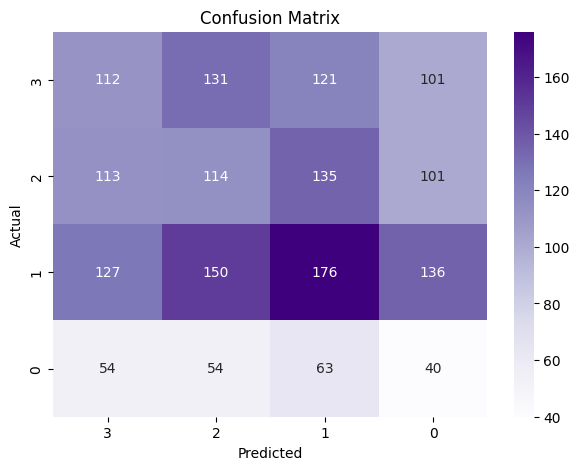

In [31]:
# Get the name of BMI levels
classes = df['bmi_level'].unique()

# plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test_male, y_pred_male,
                             labels=classes),
            cmap='Purples', annot=True, fmt='g',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Obesity Classification

Due to the imbalance of the distribution of BMI category, we decided to re-label observations with a new indicator, i.e., obesity. A BMI value that is greater than or equal to 25 will be labeled as "1", meaning overweight or high risk obesity. A BMI value that is less than 25 will be labeled as "0", meaning normal in weight or underweight.  

In [34]:
def obesity(bmi):
  if bmi < 25:
    return '0' # underweight and normal
  else:
    return '1' # obese/overwight, high risk

df['obesity'] = df['BMI'].apply(obesity)
# Split the dataset by gender
male_data = df[df['Gender'] == 1]
female_data = df[df['Gender'] == 0]

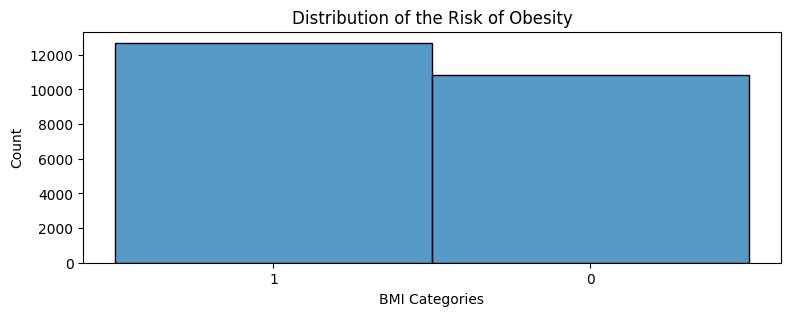

In [37]:
# looking at distribution of obesity risk
plt.figure(figsize=(9,3))
sns.histplot(df["obesity"], bins = 2, kde=False)
plt.title('Distribution of the Risk of Obesity')
plt.xlabel('BMI Categories')
plt.ylabel("Count")
plt.show()

In [35]:
# Data preparation of obesity
def obesity_data(data):
  # split the data into features and label
  X = data[['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
        'Fast_Food_Frequency', 'Screen_Time']]
  y = data['obesity']

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42)

  # Apply SMOTE on the training data set only
  smote = SMOTE(random_state = 42)
  X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

  # Scale the features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_smt)
  X_test_scaled = scaler.transform(X_test)

  return X_train_scaled, X_test_scaled, y_train_smt, y_test

# Prepare data for males and females
X_train_male, X_test_male, y_train_male, y_test_male = obesity_data(male_data)
X_train_female, X_test_female, y_train_female, y_test_female = obesity_data(female_data)

In [36]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=100)  # Setting K to 5 as an example

# Hyperparameters to tune
param_grid = {
    'n_neighbors': [5, 10, 20, 30, 40, 50, 75, 100], # number of neighbors
    'weights': ['uniform', 'distance'], # weight function used for prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'], # distance matric
    'p': [1, 2] # Power parameter for the Minkowski metric. 1 is manhattan_distance and 2 is euclidean_distance.
}

# Use GridSearchCV to find the best hyperparameters
knn_grid_search = GridSearchCV(estimator = knn,
                               param_grid = param_grid,
                               cv = 3, n_jobs = -1, verbose = 2,
                               scoring = 'accuracy')

# Train and predict the male data
knn_grid_search.fit(X_train_male, y_train_male)
print("Best Parameters: ", knn_grid_search.best_params_)
y_pred_male = knn_grid_search.best_estimator_.predict(X_test_male)
print("Classification Report for Males:")
print(classification_report(y_test_male, y_pred_male))

# Train and predict the female data
knn_grid_search.fit(X_train_female, y_train_female)
print("Best Parameters: ", knn_grid_search.best_params_)
y_pred_female = knn_grid_search.best_estimator_.predict(X_test_female)
print("Classification Report for Females:")
print(classification_report(y_test_female, y_pred_female))


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Classification Report for Males:
              precision    recall  f1-score   support

           0       0.46      0.49      0.47       787
           1       0.55      0.52      0.53       941

    accuracy                           0.50      1728
   macro avg       0.50      0.50      0.50      1728
weighted avg       0.51      0.50      0.51      1728

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Classification Report for Females:
              precision    recall  f1-score   support

           0       0.44      0.48      0.46      1325
           1       0.55      0.52      0.54      1655

    accuracy                           0.50      2980
   macro avg       0.50      0.50      0.50      2980
weighted avg       0.51    

### Decision Tree

In [33]:
# Copy the dataframe so that keep the original without any changes
dt_data = df

# Extract feature and target columns
X = dt_data[features].drop('BMI', axis = 1)
y = dt_data['bmi_level']

# Get feature and target names
feature_name = list(X.columns)
target_name = df['bmi_level'].unique().tolist()

# Initialize an oversampler
ros = RandomOverSampler(random_state = 42)

# Apply the oversampler to the dataset to balance the classes
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size = 0.2,
                                                    random_state = 5230)

# Initialize a decision tree classifier
clf = dtc(max_features = 5)

# Train the data with deciision tree
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_name))

Test Accuracy:0.55
              precision    recall  f1-score   support

           3       0.70      0.89      0.78      1507
           2       0.40      0.33      0.36      1598
           1       0.52      0.50      0.51      1604
           0       0.52      0.51      0.52      1629

    accuracy                           0.55      6338
   macro avg       0.54      0.56      0.54      6338
weighted avg       0.54      0.55      0.54      6338



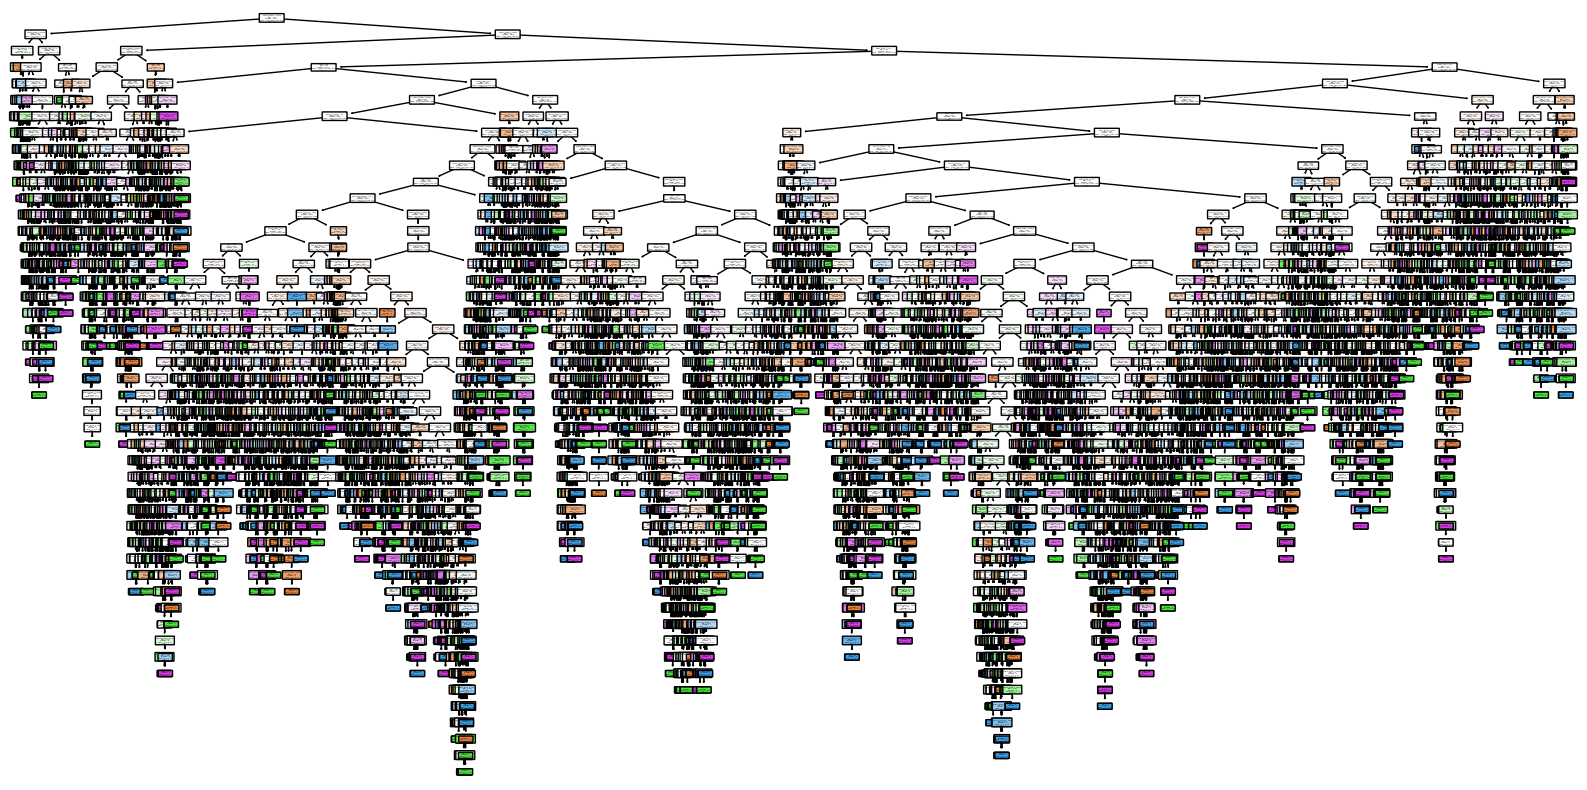

In [38]:
# Import necessary library for visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=target_name,
          feature_names=feature_name)
plt.show()